Mengimpor Library untuk Fuzzy

In [2]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 36.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=1361f6fad4990af97c459180b5bc4c335ac2313a073f29c26ab4ef8062d79952
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

Fuzzyfikasi

Menentukan variabel dan semesta pembicaraan

In [17]:
generation = ctrl.Antecedent(np.arange(0, 1000, 1), 'generation')
population = ctrl.Antecedent(np.arange(0, 1000, 1), 'population')
prob_crossover = ctrl.Consequent(np.arange(0.6, 0.9,0.01),'prob_crossover')
prob_mutasi = ctrl.Consequent(np.arange(0, 0.3, 0.01), 'prob_mutasi')

Fungsi keanggotaan jumlah populasi



In [18]:
population['small'] = fuzz.zmf(population.universe, 50, 200)
population['medium'] = fuzz.gaussmf(population.universe, mean=275, sigma=80)
population['large'] = fuzz.smf(population.universe, 350, 500)

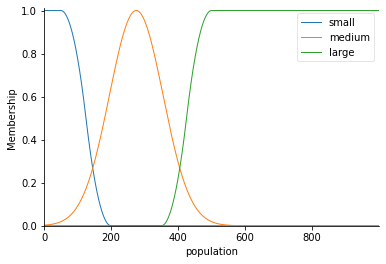

In [56]:
populationsize.view()

Fungsi keanggotaan jumlah generasi

In [19]:
generation['short'] = fuzz.zmf(generation.universe, 50, 200)
generation['medium'] = fuzz.gaussmf(generation.universe, mean=275, sigma=80)
generation['long'] = fuzz.smf(generation.universe, 350, 500)

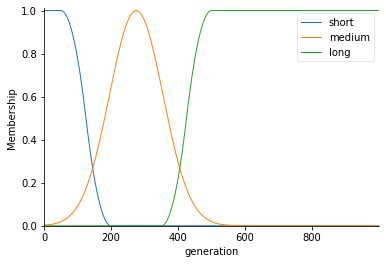

In [58]:
generation.view()

Fungsi keanggotaan probabilitas crossover

In [20]:
prob_crossover['small'] = fuzz.zmf(prob_crossover.universe, 0.625, 0.7)
prob_crossover['medium'] = fuzz.trapmf(prob_crossover.universe, [0.63, 0.7, 0.72, 0.78])
prob_crossover['large'] = fuzz.trapmf(prob_crossover.universe, [0.72, 0.78, 0.8, 0.87])
prob_crossover['very_large'] = fuzz.smf(prob_crossover.universe, 0.8, 0.875)

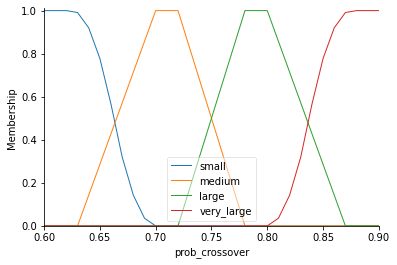

In [60]:
prob_crossover.view()

Fungsi keanggotaan probabilitas mutasi

In [21]:
prob_mutasi['very_small'] = fuzz.zmf(prob_mutasi.universe, 0.025, 0.1)
prob_mutasi['small'] = fuzz.trapmf(prob_mutasi.universe, [0.047, 0.083, 0.1, 0.14])
prob_mutasi['medium'] = fuzz.trapmf(prob_mutasi.universe, [0.1, 0.14, 0.167, 0.2])
prob_mutasi['large'] = fuzz.smf(prob_mutasi.universe, 0.15, 0.225)

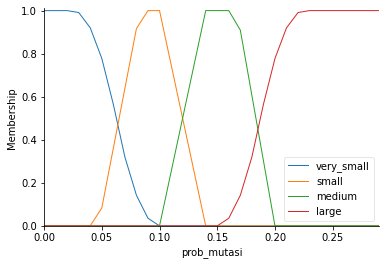

In [62]:
prob_mutasi.view()

In [46]:
crossover_rule1 = ctrl.Rule(antecedent=(population['small'] & generation['short']), consequent=prob_crossover['medium'])
crossover_rule2 = ctrl.Rule(antecedent=(population['medium'] &  generation['short']), consequent=prob_crossover['small'])
crossover_rule3 = ctrl.Rule(antecedent=(population['large'] & generation['short']), consequent=prob_crossover['small'])
crossover_rule4 = ctrl.Rule(antecedent=(population['small'] & generation['medium']), consequent=prob_crossover['large'])
crossover_rule5 = ctrl.Rule(antecedent=(population['medium'] & generation['medium']), consequent=prob_crossover['large'])
crossover_rule6 = ctrl.Rule(antecedent=(population['large'] & generation['medium']), consequent=prob_crossover['medium'])
crossover_rule7 = ctrl.Rule(antecedent=(population['small'] & generation['long']), consequent=prob_crossover['very_large'])
crossover_rule8 = ctrl.Rule(antecedent=(population['medium'] & generation['long']), consequent=prob_crossover['very_large'])
crossover_rule9 = ctrl.Rule(antecedent=(population['large'] & generation['long']), consequent=prob_crossover['large'])

In [50]:
mutasi_rule1 = ctrl.Rule(antecedent=(population['small'] & generation['short']), consequent=prob_mutasi['large'])
mutasi_rule2 = ctrl.Rule(antecedent=(population['medium'] & generation['short']), consequent=prob_mutasi['medium'])
mutasi_rule3 = ctrl.Rule(antecedent=(population['large'] & generation['short']), consequent=prob_mutasi['small'])
mutasi_rule4 = ctrl.Rule(antecedent=(population['small'] & generation['medium']), consequent=prob_mutasi['medium'])
mutasi_rule5 = ctrl.Rule(antecedent=(population['medium'] & generation['medium']), consequent=prob_mutasi['small'])
mutasi_rule6 = ctrl.Rule(antecedent=(population['large'] & generation['medium']), consequent=prob_mutasi['very_small'])
mutasi_rule7 = ctrl.Rule(antecedent=(population['small'] & generation['long']), consequent=prob_mutasi['small'])
mutasi_rule8 = ctrl.Rule(antecedent=(population['medium'] & generation['long']), consequent=prob_mutasi['very_small'])
mutasi_rule9 = ctrl.Rule(antecedent=(population['large'] & generation['long']), consequent=prob_mutasi['very_small'])

In [51]:
crossover_value = ctrl.ControlSystem([crossover_rule1, crossover_rule2, crossover_rule3, crossover_rule4, crossover_rule5, crossover_rule6, crossover_rule7, crossover_rule8, crossover_rule9])


In [52]:
mutasi_value = ctrl.ControlSystem([mutasi_rule1, mutasi_rule2, mutasi_rule3, mutasi_rule4, mutasi_rule5, mutasi_rule6, mutasi_rule7, mutasi_rule8, mutasi_rule9])

In [53]:
crossover_simulation = ctrl.ControlSystemSimulation(crossover_value)
mutasi_simulation = ctrl.ControlSystemSimulation(mutasi_value)

In [59]:
crossover_simulation.input['population'] = 10
crossover_simulation.input['generation'] = 100

In [60]:
mutasi_simulation.input['population'] = 10
mutasi_simulation.input['generation'] = 100

In [61]:
crossover_simulation.compute()
crossover = crossover_simulation.compute()
crossover = crossover_simulation.output['prob_crossover']
print ("Nilai crossover = %.2f" % crossover)

Nilai crossover = 0.72


In [62]:
mutasi_simulation.compute()
mutasi = mutasi_simulation.compute()
mutasi = mutasi_simulation.output['prob_mutasi']
print ("Nilai mutasi = %.2f" % mutasi)

Nilai mutasi = 0.23
